<a href="https://colab.research.google.com/github/ArafatRohan93/Diabetic_Retinopathy/blob/master/Python/Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Drive to access datasets
We have the dataset from Kaggle Competition APTOS 2019 Blindness Detection which provide more than 4000 images for different severity of Diabetic Retinopathy.We've splitted the whole dataset into Training Directory containing 3824 images belonging to 5 classes and Testing directory containing 275 images belonging to 5 classes.
These 5 classes are :

0 - No DR


1 - Mild


2 - Moderate


3 - Severe


4 - Proliferative DR  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
Training_Dir = '/content/drive/My Drive/DR/Train/'
Testing_Dir = '/content/drive/My Drive/DR/Test/'

#Import Libraries

In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

#Defining Training and Testing data generator using Keras ImageDataGenerator

In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255)

testing_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	Training_Dir,
	target_size=(224,224),
  shuffle=True,
	class_mode='categorical'
)


testing_generator = testing_datagen.flow_from_directory(
	Testing_Dir,
	target_size=(224,224),
  shuffle=True,
	class_mode='categorical'
)

Found 2918 images belonging to 5 classes.
Found 729 images belonging to 5 classes.


#Checking the Classes and Number of images in each directory for training and testing

In [5]:
import numpy as np
np.unique(train_generator.classes)

array([0, 1, 2, 3, 4], dtype=int32)

In [6]:
train_generator.class_indices,testing_generator.class_indices

({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4},
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4})

In [7]:
np.unique(train_generator.classes, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1436,  295,  795,  155,  237]))

In [8]:
np.unique(testing_generator.classes, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([360,  74, 199,  38,  58]))

#Defining the CNN model 

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
'''
#only to load pretrained model....

from keras.models import load_model
from keras.preprocessing import image

model = tf.keras.models.load_model('/content/drive/My Drive/Kaggle/DR_Custom/ModelUltra.hdf5')
model.layers[0].input_shape'''

(None, 224, 224, 3)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

#Compiling and training the model 

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint
filepath = "/content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit_generator(train_generator, epochs=2, verbose = 1, callbacks= callbacks_list)


Epoch 1/2
91/92 [============================>.] - ETA: 3s - loss: 0.7678 - acc: 0.7249
Epoch 00001: acc improved from -inf to 0.72550, saving model to /content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5
92/92 [==============================] - 362s 4s/step - loss: 0.7665 - acc: 0.7255
Epoch 2/2
91/92 [============================>.] - ETA: 3s - loss: 0.7282 - acc: 0.7342
Epoch 00002: acc improved from 0.72550 to 0.73475, saving model to /content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5
92/92 [==============================] - 345s 4s/step - loss: 0.7274 - acc: 0.7347


In [38]:
history = model.fit_generator(train_generator, epochs=10, verbose = 1, callbacks= callbacks_list)

Epoch 1/10
91/92 [============================>.] - ETA: 12s - loss: 0.7034 - acc: 0.7481
Epoch 00001: acc improved from 0.73475 to 0.74812, saving model to /content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5
92/92 [==============================] - 1166s 13s/step - loss: 0.7059 - acc: 0.7481
Epoch 2/10
91/92 [============================>.] - ETA: 3s - loss: 0.6695 - acc: 0.7564
Epoch 00002: acc improved from 0.74812 to 0.75600, saving model to /content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5
92/92 [==============================] - 348s 4s/step - loss: 0.6689 - acc: 0.7560
Epoch 3/10
91/92 [============================>.] - ETA: 3s - loss: 0.6464 - acc: 0.7613
Epoch 00003: acc improved from 0.75600 to 0.76251, saving model to /content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5
92/92 [==============================] - 383s 4s/step - loss: 0.6436 - acc: 0.7625
Epoch 4/10
91/92 [============================>.] - ETA: 3s - loss: 0.6016 - acc: 0.7793
Epoch 00004

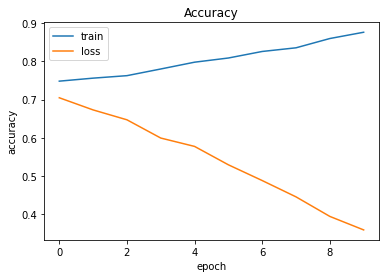

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','loss'])

plt.show()

#Evaluating the keras model

##Evaluating Model for Train ImageDataGenerator

In [0]:
#-----------------------------------------------------------train---------------------------------------------------------------
y_train_pred = model.predict_generator(train_generator)
y_train = train_generator.classes[train_generator.index_array]
y_train_pred = np.argmax(y_train_pred, axis=-1)

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_train, y_train_pred)

In [42]:
cnf_matrix 

array([[1416,    8,   12,    0,    0],
       [  20,  213,   51,    5,    6],
       [  18,   18,  745,    3,   11],
       [   0,    2,   17,  133,    3],
       [   3,    2,   50,    7,  175]])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9191226867717615

In [0]:
from sklearn.metrics import classification_report
target_names = ['No DR', 'Mild', 'Moderate', 'Severe','Proliferative DR']

In [45]:
print(classification_report(y_train, y_train_pred, target_names=target_names))

                  precision    recall  f1-score   support

           No DR       0.97      0.99      0.98      1436
            Mild       0.88      0.72      0.79       295
        Moderate       0.85      0.94      0.89       795
          Severe       0.90      0.86      0.88       155
Proliferative DR       0.90      0.74      0.81       237

        accuracy                           0.92      2918
       macro avg       0.90      0.85      0.87      2918
    weighted avg       0.92      0.92      0.92      2918



##Evaluating Model for Test ImageDataGenerator

In [0]:
#---------------------------------------------------------------test--------------------------------------------------------
y_test_pred = model.predict_generator(testing_generator)
y_test = testing_generator.classes[testing_generator.index_array]
y_test_pred = np.argmax(y_test_pred, axis=-1)

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [48]:
cnf_matrix_test

array([[194,  29, 104,  16,  17],
       [ 37,   4,  30,   0,   3],
       [ 85,  19,  66,   9,  20],
       [ 19,   3,  11,   2,   3],
       [ 29,   9,  17,   1,   2]])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.3676268861454047

#Saving the model as Keras model (.hdf5 file) in Drive 

In [0]:
import tensorflow as tf
keras = tf.keras
keras_model = "/content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5"
keras.models.save_model(model, keras_model)

# Here is a prediction module

In [51]:
try:
  %tensorflow_version 2.x
except:
  pass

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
keras = tf.keras
keras_model = "/content/drive/My Drive/DR/CNN_Models/Sequential_Model.hdf5"

In [0]:
main_model = keras.models.load_model(keras_model)

In [54]:
main_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [0]:
image, labels = testing_generator.next()

In [0]:
predicted_classes = main_model.predict_classes(image)

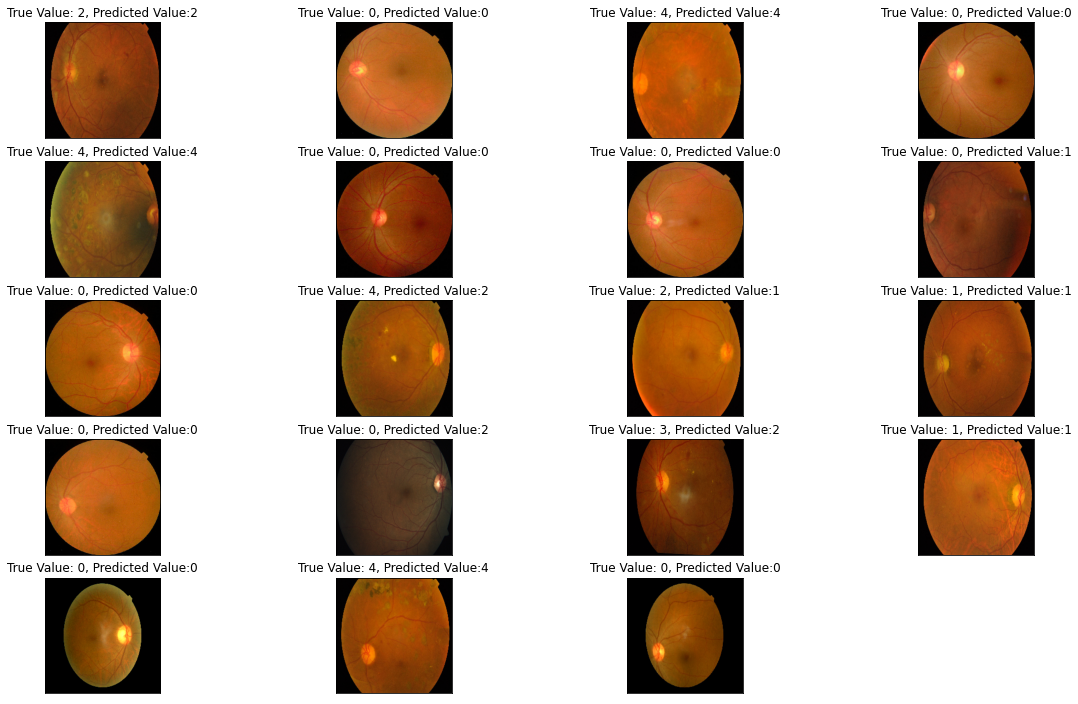

In [57]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 20))
n = 4
im = 8
for i in range(1,20):
    ax = plt.subplot(im, n, i)
    plt.imshow(image[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("True Value: {}, Predicted Value:{}".format(np.argmax(labels[i]), predicted_classes[i]))
plt.show()

# TFLite Part

In [58]:
SAVED_MODEL = "saved_models/models/ultra"
tf.keras.experimental.export_saved_model(model, SAVED_MODEL)

Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatu

In [59]:
converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_model) # TF 2.0
tflite_model = converter.convert()
tflite_model_file_name = "/content/drive/My Drive/DR/TFLite_Models/Sequential.tflite"
open(tflite_model_file_name, "wb").write(tflite_model)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


38804820

#CoreML part

In [0]:
!pip install coremltools

     |████████████████████████████████| 3.4MB 38.9MB/s 


In [0]:
from keras.models import load_model  
import coremltools
import tensorflow as tf 
target_names = ['No DR', 'Mild', 'Moderate', 'Severe','Proliferative DR']
modelx = tf.keras.models.load_model('/content/drive/My Drive/Kaggle/DR_Custom/ModelUltra.hdf5')
coreml_model = coremltools.converters.keras.convert(modelx, input_names="image",
	image_input_names="image",
	class_labels=target_names)

coreml_model.save('/content/drive/My Drive/Kaggle/DR_Custom/MAC_DR.mlmodel')

Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


ValueError: ignored

In [0]:
!pip install --upgrade tfcoreml
!pip install --upgrade coremltools 

     |████████████████████████████████| 51kB 7.7MB/s 
Requirement already up-to-date: coremltools in /usr/local/lib/python3.6/dist-packages (3.1)


In [0]:
import tfcoreml
# save the tf.keras model as .h5 model file
model_file = '/content/drive/My Drive/Kaggle/DR_Custom/ModelUltra.hdf5'
#keras_model.save(model_file)
target_names = ['0','1','2','3','4']
modelp = tfcoreml.convert(tf_model_path=model_file,
                         input_name_shape_dict={'conv2d_8_input': (None, 222, 222, 64)},
                         output_feature_names=["Identity"],
                         minimum_ios_deployment_target='11.2')
modelp.save('/content/drive/My Drive/Kaggle/DR_Custom/MAC_DR.mlmodel')


Loading the TF graph...
Graph Loaded.
Now finding ops in the TF graph that can be dropped for inference
Done.


/usr/local/lib/python3.6/dist-packages/tfcoreml/_tf_coreml_converter.py:216: RuntimeWarning: Unexpected end-group tag: Not all data was converted
  gdef.ParseFromString(serialized)


ValueError: ignored

In [0]:
modelx.layers[index].output

NameError: ignored

In [0]:
modelx.feature()

AttributeError: ignored